# Detection of a Quantum Biscuit with Qiskit

# 1. Initial Experiment
In the experiment we have a specific area, in which there could be a quantum biscuit (marked by a red rectangle). If a single photon touches the biscuit, the biscuit is ruined.
We want to find out, whether we have a biscuit in this specific area or not without ruining a potential biscuit.

We start by sending a photon (yellow arrow) as a macroscopic object to the first beamsplitter (blue line).
In this experiment there are two mirrors (the black lines), another beamsplitter (the second blue line) and two detectors D1 and D2 (the silver trapezes).


<img src="new_Images/initial_2022-04-18 104718.png" width=400/>

## Biscuit tester without biscuit

To find out whether we have a biscuit in the
specified area, we first look at the case, where
there is no biscuit. In this case we send a photon
with a beamsplitter in a superposition, where
the photon takes the way up − right and right −
up at the same time.
After being reflected by mirrors, the two superpositions of the photon collapse into a macroscopic photon object, which goes to the right
side. Now the photon is detected by D1. [9]
The yellow arrow indicates a photon in case it
is an object, in case of a wave the arrow is lightblue.


<img src="new_Images/No-bomb_2022-04-18.png" width=400/>




## Biscuit tester with biscuit

Now we do the exact same thing, but we put a biscuit in the specified area (the biscuit
is represented by the blue dot). The photon is now in a superposition, until it reaches
the biscuit. When the wave photon reaches the biscuit, we have a measurement. As
a result of the measurement, the superposition of the photon collapses. The photon
either takes the up − right or right − up way. Lets first look at the case, where the
photon decides to take the way, in which the biscuit is (up − right). The biscuit is
ruined and the photon reaches neither the detector D1 or D2.

<img src="new_Images/bomb_before_reached_2022-04-18.png" width=400 height=400 />
<img src="new_Images/a_bomb_detected_2022-04-18 104423.png" width=400 height=400 />

If the photon takes the other way, we have it as a particle between the first and second
beamsplitter. When the photon reaches the second beamsplitter as a particle, it is again
brought in a superposition. In this case, we can either measure it in D1 or D2.

<img src="new_Images/a_bomb_but_no_detection_d2_d1_2022-04-18.png" width=400 height=400 />
<img src="new_Images/a_bomb_but_no_detection_d1_2022-04-18.png" width=400 height=400 />
<img src="new_Images/a_bomb_but_no_detection_d2_2022-04-18.png" width=400 height=400 />

## Result of the initial experiment

According to [9] there are three possible outcomes of this measurement:
1. no detector clicks, the biscuit is ruined
2. detector D1 clicks, there is a biscuit which is not yet ruined or there is no biscuit
3. detector D2 clicks, there is a biscuit, which is not yet ruined.

# Bomb tester with bomb with hadamad gate
Now, we have simulated this in qiskit in reference to [10]. q (later q0) represents the
photon. We initially use Hadamard gates as beamsplitter. This makes sense, since a
beamsplitter makes a qubit go from the states 0 or 1 to a superposition of 1 and 0 and
in the other direction.

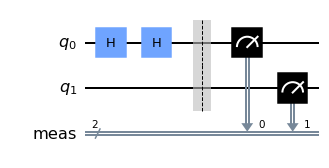

In [1]:
# Code for the basic bomb tester circuit

from qiskit import QuantumCircuit
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

bomb_tester_without_bomb = QuantumCircuit(2)
bomb_tester_without_bomb.h(0)

bomb_tester_without_bomb.h(0)
# bomb_tester_without_bomb.z(0)
bomb_tester_without_bomb.measure_all()
bomb_tester_without_bomb.draw(output='mpl')
# Running the basic bomb tester circuit

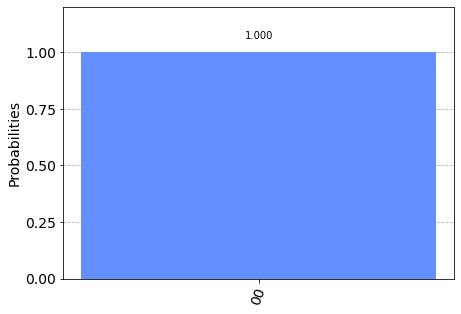

In [2]:
simulator = QasmSimulator()

job = simulator.run(bomb_tester_without_bomb, shots=1000)
result = job.result()
counts = result.get_counts(bomb_tester_without_bomb)


plot_histogram(counts)

We get as result 100% probability for the state $$ |00\rangle $$
This is logical, because we have the inputs $$ |00\rangle $$ of qo and q1 combined.

$$ (H ⨂ I ) (H ⨂ I ) |00\rangle=\frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = \frac 1 {2} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix} = \frac 1 {2} \begin{pmatrix} 2 \\ 0 \\ 0 \\ 0\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = |00\rangle $$

As described earlier in the experiment we only get zero as a result.
Now we add a measurement in the experiment to represent the biscuit. We now mea-
sure both 1 and 0 with the same possibility. But don’t yet know, if the biscuit is ruined.

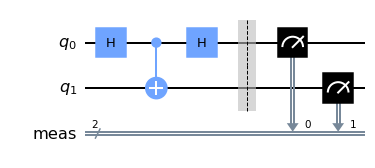

In [3]:
# Code for the basic bomb tester circuit

from qiskit import QuantumCircuit
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

bomb_tester_with_bomb = QuantumCircuit(2)
bomb_tester_with_bomb.h(0)
bomb_tester_with_bomb.cx(0, 1)
bomb_tester_with_bomb.h(0)
# bomb_tester_with_bomb.z(0)
bomb_tester_with_bomb.measure_all()
bomb_tester_with_bomb.draw(output='mpl')

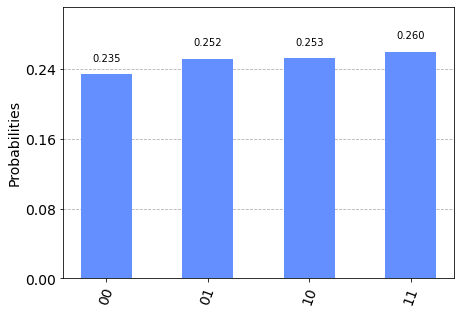

In [4]:
# Running the basic bomb tester circuit
simulator = QasmSimulator()

job = simulator.run(bomb_tester_with_bomb, shots=1000)
result = job.result()
counts = result.get_counts(bomb_tester_with_bomb)


plot_histogram(counts)

The following calcualtion shows, why we have the result.

$$ (H ⨂ I ) CX (H ⨂ I ) |00\rangle = (H ⨂ I ) CX  \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix}  \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix} = $$

$$(H ⨂ I ) CX \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0\end{pmatrix}$$

$$ = (H ⨂ I ) CX \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix} = (H ⨂ I ) \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{pmatrix} \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0\end{pmatrix}  = (H ⨂ I ) \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 1\end{pmatrix} $$

$$ = \frac 1 {\sqrt{2}} \begin{pmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & -1 & 0 \\ 0 & 1 & 0 & -1\end{pmatrix} \frac 1 {\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 1\end{pmatrix}  = \frac 1 {2} \begin{pmatrix} 1 \\ 1 \\ 1 \\ -1\end{pmatrix} $$

To imitate, whether the biscuit is ruined or not, we add another qubit and a CNOT gate.
q0 is represented by the right output number
q1 is represented by the left output number
In the yellow marked area are the probabilities, that
the biscuit is ruined. As a result in
1. 50% of the cases the biscuit is ruined
2. 25% of the cases the biscuit is found without it
being ruined
3. 25% of the cases there is no information whether
the biscuit is found or not
The goal is now to lower the probability of the biscuit
being ruined. Therefore we want to turn the photon with the first beamsplitter in a
superposition, where it is more likely for the photon to take the way without a biscuit,
if exists a biscuit




# Code for the basic bomb tester circuit

from qiskit import QuantumCircuit

bomb_tester = QuantumCircuit(2)
bomb_tester.h(0)
bomb_tester.cx(0, 1)
bomb_tester.h(0)
bomb_tester.measure_all()
bomb_tester.draw(output='mpl')


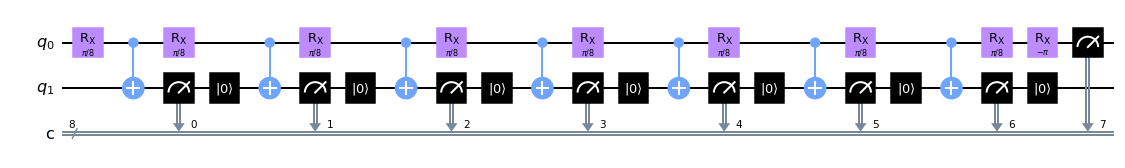

In [5]:
from qiskit.circuit import QuantumRegister, ClassicalRegister
import numpy as np
from qiskit.circuit.library import RXGate, RYGate

from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

simulator = QasmSimulator()



cycles = 8 # Choose the number of times we want to pass our photon through the mystery box. The more, the better.
theta = np.pi/cycles # The correct reflectivity of our beamsplitter is chosen for the quantum Zeno effect to work.

# Create our quantum circuit
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(cycles, 'c')
zeno_tester = QuantumCircuit(qr, cr)

# Create a chain of our variable beamsplitters and C-NOT bombs
for cycle in range(cycles-1):
    zeno_tester.append(RXGate(theta), [qr[0]])
    zeno_tester.cx(0, 1)
    zeno_tester.measure(qr[1],cr[cycle])
    zeno_tester.reset(qr[1])

# Add a final beamsplitter
zeno_tester.append(RXGate(theta), [qr[0]])
zeno_tester.append(RXGate(-np.pi), [qr[0]])

#Measure our photon to predict whether there is a bomb, and measure our bomb qubit to see if it exploded.
zeno_tester.measure(qr[0],cr[cycles-1])
zeno_tester.draw(output='mpl')


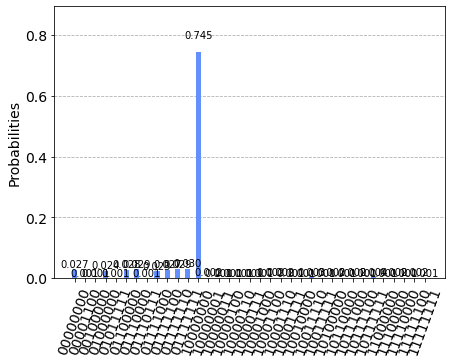

In [6]:
# Running the Zeno bomb tester

zeno_job = simulator.run(zeno_tester, shots=1000)
zeno_result = zeno_job.result()
zeno_counts = zeno_result.get_counts(zeno_tester)

plot_histogram(zeno_counts)

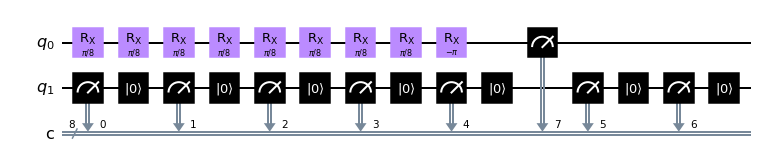

In [7]:
from qiskit.circuit import QuantumRegister, ClassicalRegister
import numpy as np
from qiskit.circuit.library import RXGate, RYGate

from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

simulator = QasmSimulator()



cycles = 8 # Choose the number of times we want to pass our photon through the mystery box. The more, the better.
theta = np.pi/cycles # The correct reflectivity of our beamsplitter is chosen for the quantum Zeno effect to work.

# Create our quantum circuit
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(cycles, 'c')
zeno_tester = QuantumCircuit(qr, cr)

# Create a chain of our variable beamsplitters and C-NOT bombs
for cycle in range(cycles-1):
    zeno_tester.append(RXGate(theta), [qr[0]])
    zeno_tester.measure(qr[1],cr[cycle])
    zeno_tester.reset(qr[1])

# Add a final beamsplitter
zeno_tester.append(RXGate(theta), [qr[0]])
zeno_tester.append(RXGate(-np.pi), [qr[0]])

#Measure our photon to predict whether there is a bomb, and measure our bomb qubit to see if it exploded.
zeno_tester.measure(qr[0],cr[cycles-1])
zeno_tester.draw(output='mpl')


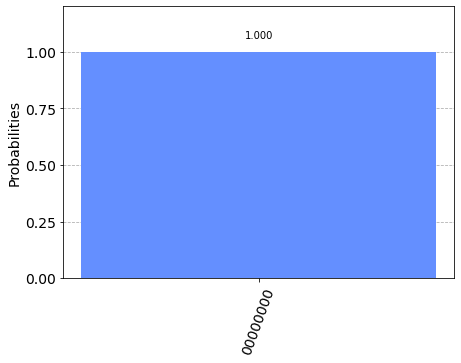

In [8]:
# Running the Zeno bomb tester

zeno_job = simulator.run(zeno_tester, shots=1000)
zeno_result = zeno_job.result()
zeno_counts = zeno_result.get_counts(zeno_tester)

plot_histogram(zeno_counts)

# own realisation

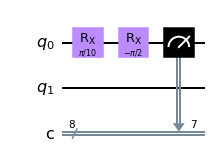

In [9]:
from qiskit.circuit import QuantumRegister, ClassicalRegister
import numpy as np
from qiskit.circuit.library import RXGate, RYGate

from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

simulator = QasmSimulator()



cycles = 8 # Choose the number of times we want to pass our photon through the mystery box. The more, the better.
theta = np.pi/cycles # The correct reflectivity of our beamsplitter is chosen for the quantum Zeno effect to work.

# Create our quantum circuit
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(cycles, 'c')
zeno_tester = QuantumCircuit(qr, cr)

# Add a final beamsplitter
zeno_tester.append(RXGate(np.pi/10), [qr[0]])
zeno_tester.append(RXGate(-np.pi/2), [qr[0]])

#Measure our photon to predict whether there is a bomb, and measure our bomb qubit to see if it exploded.
zeno_tester.measure(qr[0],cr[cycles-1])
zeno_tester.draw(output='mpl')



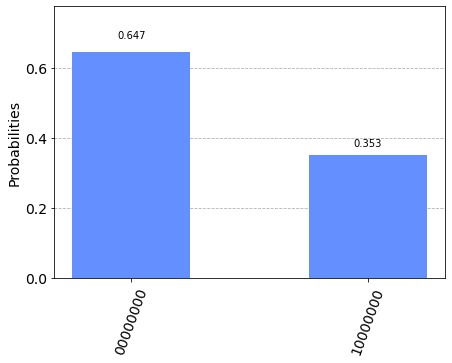

In [10]:
# Running the basic bomb tester circuit
simulator = QasmSimulator()

job = simulator.run(zeno_tester, shots=1000)
result = job.result()
counts = result.get_counts(zeno_tester)


plot_histogram(counts)

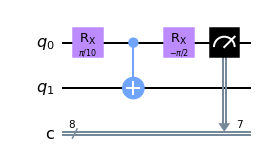

In [11]:
from qiskit.circuit import QuantumRegister, ClassicalRegister
import numpy as np
from qiskit.circuit.library import RXGate, RYGate

from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

simulator = QasmSimulator()



cycles = 8 # Choose the number of times we want to pass our photon through the mystery box. The more, the better.
theta = np.pi/cycles # The correct reflectivity of our beamsplitter is chosen for the quantum Zeno effect to work.

# Create our quantum circuit
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(cycles, 'c')
zeno_tester = QuantumCircuit(qr, cr)

# Add a final beamsplitter
zeno_tester.append(RXGate(np.pi/10), [qr[0]])
zeno_tester.cx(0, 1)
zeno_tester.append(RXGate(-np.pi/2), [qr[0]])

#Measure our photon to predict whether there is a bomb, and measure our bomb qubit to see if it exploded.
zeno_tester.measure(qr[0],cr[cycles-1])
zeno_tester.draw(output='mpl')


In [ ]:
# Running the basic bomb tester circuit
simulator = QasmSimulator()

job = simulator.run(zeno_tester, shots=1000)
result = job.result()
counts = result.get_counts(zeno_tester)


plot_histogram(counts)


# Optimization
To improve the probabilities of our Biscuit-Tester when deploying the code on a Quantum Computer, we have mulitple options. The options can be devided into two categories, soft- and hardware based improvements.

## Software optimization
Software enabled optimization is the

The here used techniques are:
- noise reduction
- Measurement Error Mitigation

## Hardware optimization

## Noise reduction
Noise increases the more Gates we add to the circuit. Optimization is done with the qiskit transpiler function to decrease the noise at the final gate. 

With this function, the original circuit gets translated into a new circuit with the gates used by the Quantum Computer on which the program is deployed. 

In [ ]:
#code setup for the optimization
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister, execute, transpile, Aer, IBMQ # circuit creation and execution
from qiskit.providers.aer.noise import NoiseModel # simulate backends
from qiskit.visualization import plot_histogram # visualize results
from qiskit.quantum_info import Statevector, state_fidelity, hellinger_fidelity # statevector and metrics
from qiskit.providers.ibmq import least_busy # get least busy device
import qiskit.tools.jupyter # visualize backends
from qiskit.circuit.library.standard_gates.rx import RXGate
# from qiskit.ignis.mitigation.measurement import complete_meas_cal,CompleteMeasFitter # measurement error mitigation

import pandas as pd # handy tools for calculation
from numpy import pi
import pandas as pd
import matplotlib.pyplot as plt

# global vars
n = 3 # number of qubits
shotz = 3000 # high number of shots per execution

circuit = zeno_tester;

In [ ]:
#importing a fake backend, similar to the later used imbq_santiago for test purposes
from qiskit.test.mock import *

backends = [FakeVigo()]
backend1 = FakeVigo()

In [ ]:
optimization_levels = [3] #option to optimize for different grades, use [0,1,2,3,]
for optim_level in optimization_levels:
    #print(f"optimization level: {optim_level}") #since only optimizing on level 3 not used
    transpiled_circuit = transpile(circuit, backend=backend1, optimization_level=optim_level)
    #print(transpiled_circuit) #uncommend to print circuit as scripture
    #print(transpiled_circuit.qasm()) #uncommend to print circuit as qasm code
    print("optimized circuit")
transpiled_circuit.draw(output='mpl')

When simulating the improved circuit, the result has clearly improved.

In [ ]:
# Running the basic bomb tester circuit
simulator = QasmSimulator()

job = simulator.run(circuit, shotz)
result = job.result()
counts = result.get_counts(circuit)


plot_histogram(counts)

# Measurement Error Mitigation

## Hardware optimization
Hardware based optimizationn achieves only minor improvements compared to Software based ones, but it is easier to implement.

It works by deploying the circuit on a Quantum Computer with a higher Quantum Volume(QV). QV measures several features of a Quantum Computer, among other things, the number of qubits as well as gate and measurement errors.

We tested our improved programm against the base one on two systems with the following QV: 8 and 32.

On the system with a QV of 8 the improvemnt is:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('./Data/00.csv' )
df2 = pd.read_csv('./Data/10.csv')
df1["versuch"]="r"
df2["versuch"]="b"

#print(df)
plt.ylabel("Frequency")
plt.xlabel("Measurement outcome")
plt.bar(x=df1.index-0.1, height=df1["Frequency"],color=df1["versuch"],width=0.2,tick_label=["000000","000001","000010","000011"],label='QV of 8')
plt.bar(x=df2.index+0.1, height=df2["Frequency"],color=df2["versuch"],width=0.2,tick_label=["000000","000001","000010","000011"],label='QV of 32')
plt.legend()
plt.show()
print("Improvement ")
print("00 vs 10")

In [13]:
#code setup for the optimization
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister, execute, transpile, Aer, IBMQ # circuit creation and execution
from qiskit.providers.aer.noise import NoiseModel # simulate backends
from qiskit.visualization import plot_histogram # visualize results
from qiskit.quantum_info import Statevector, state_fidelity, hellinger_fidelity # statevector and metrics
from qiskit.providers.ibmq import least_busy # get least busy device
import qiskit.tools.jupyter # visualize backends
from qiskit.circuit.library.standard_gates.rx import RXGate
# from qiskit.ignis.mitigation.measurement import complete_meas_cal,CompleteMeasFitter # measurement error mitigation

import pandas as pd # handy tools for calculation
from numpy import pi
import pandas as pd
import matplotlib.pyplot as plt

# global vars
n = 3 # number of qubits
shotz = 3000 # high number of shots per execution

circuit = zeno_tester;

In [14]:
#importing a fake backend, similar to the later used imbq_santiago for test purposes
from qiskit.test.mock import *

backends = [FakeVigo()]
backend1 = FakeVigo()

optimized circuit


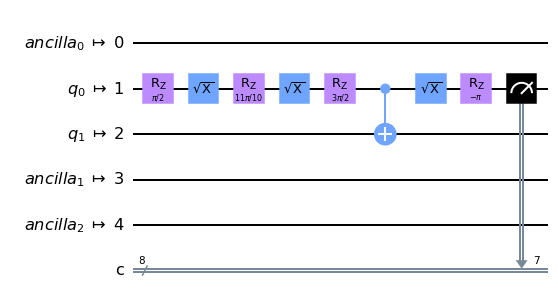

In [15]:
optimization_levels = [3] #option to optimize for different grades, use [0,1,2,3,]
for optim_level in optimization_levels:
    #print(f"optimization level: {optim_level}") #since only optimizing on level 3 not used
    transpiled_circuit = transpile(circuit, backend=backend1, optimization_level=optim_level)
    #print(transpiled_circuit) #uncommend to print circuit as scripture
    #print(transpiled_circuit.qasm()) #uncommend to print circuit as qasm code
    print("optimized circuit")
transpiled_circuit.draw(output='mpl')

When simulating the improved circuit, the result has clearly improved.

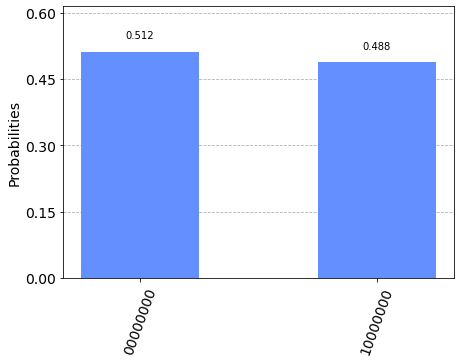

In [16]:
# Running the basic bomb tester circuit
simulator = QasmSimulator()

job = simulator.run(circuit, shotz)
result = job.result()
counts = result.get_counts(circuit)


plot_histogram(counts)

# Measurement Error Mitigation

## Hardware optimization
Hardware based optimizationn achieves only minor improvements compared to Software based ones, but it is easier to implement.

It works by deploying the circuit on a Quantum Computer with a higher Quantum Volume(QV). QV measures several features of a Quantum Computer, among other things, the number of qubits as well as gate and measurement errors.

We tested our improved programm against the base one on two systems with the following QV: 8 and 32.

On the system with a QV of 8 the improvemnt is:

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('./Data/00.csv' )
df2 = pd.read_csv('./Data/10.csv')
df1["versuch"]="r"
df2["versuch"]="b"

#print(df)
plt.ylabel("Frequency")
plt.xlabel("Measurement outcome")
plt.bar(x=df1.index-0.1, height=df1["Frequency"],color=df1["versuch"],width=0.2,tick_label=["000000","000001","000010","000011"],label='QV of 8')
plt.bar(x=df2.index+0.1, height=df2["Frequency"],color=df2["versuch"],width=0.2,tick_label=["000000","000001","000010","000011"],label='QV of 32')
plt.legend()
plt.show()
print("Improvement ")
print("00 vs 10")

FileNotFoundError: [Errno 2] No such file or directory: './Data/00.csv'